<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [6]:
dados = pd.read_csv("HousePrices_HalfMil.csv", sep=';')
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Visualizar os dados

In [7]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [8]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [10]:
dados.describe()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [11]:
dados.corr()

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garagem,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
banheiros,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
lareira,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marmore,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
andares,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [12]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [21]:
sns.set_palette("Accent")

sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0, 0.5, 'Dolar')

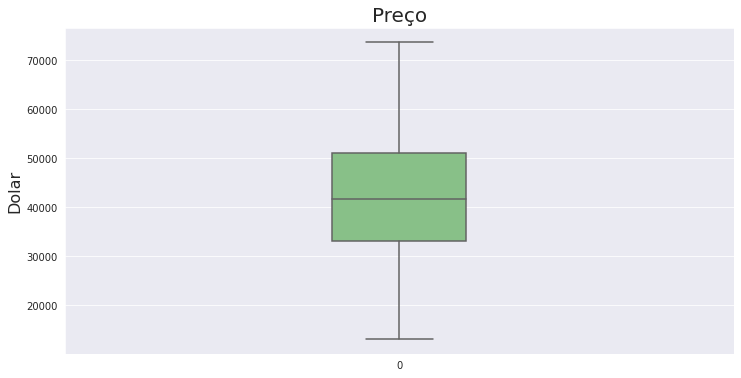

In [29]:
ax = sns.boxplot(data=dados['precos'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title("Preço", fontsize=20)
ax.set_ylabel("Dolar", fontsize=16)

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

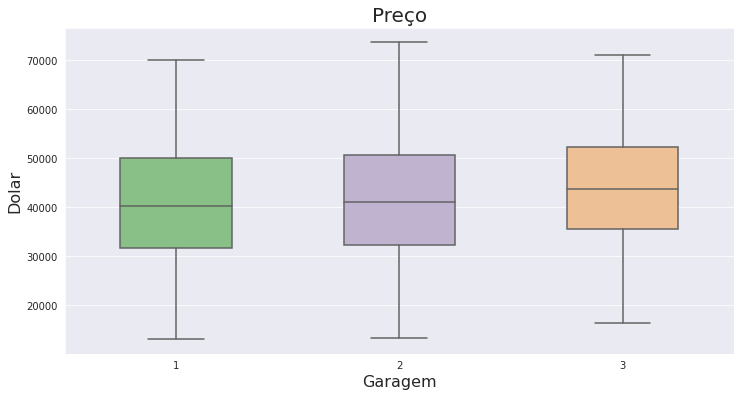

In [32]:
ax = sns.boxplot(y='precos', x='garagem', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço', fontsize=20)
ax.set_ylabel('Dolar', fontsize=16)
ax.set_xlabel('Garagem', fontsize=16)
ax

### Box-plot (Preço X Banheiros)

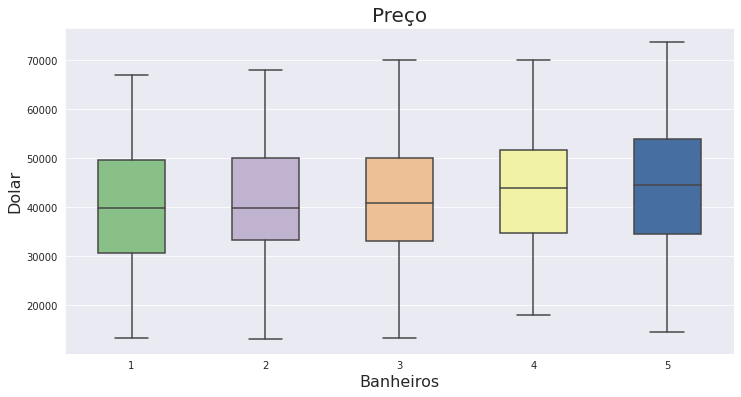

In [33]:
ax = sns.boxplot(y='precos', x='banheiros', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço', fontsize=20)
ax.set_ylabel('Dolar', fontsize=16)
ax.set_xlabel('Banheiros', fontsize=16)
ax

### Box-plot (Preço X Lareira)

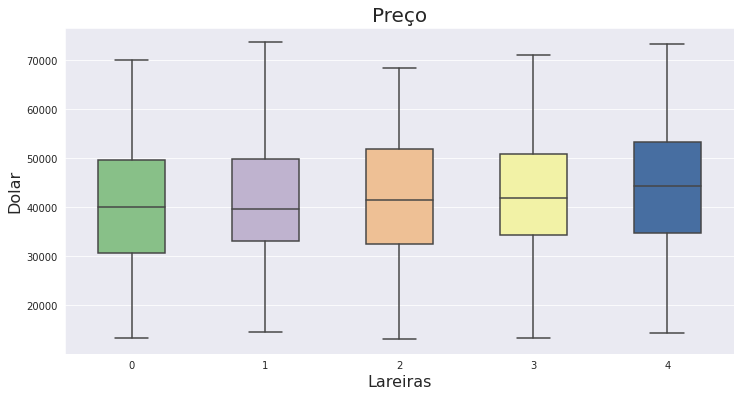

In [34]:
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço', fontsize=20)
ax.set_ylabel('Dolar', fontsize=16)
ax.set_xlabel('Lareiras', fontsize=16)
ax

### Box-plot (Preço X Acabamento em Mármore)

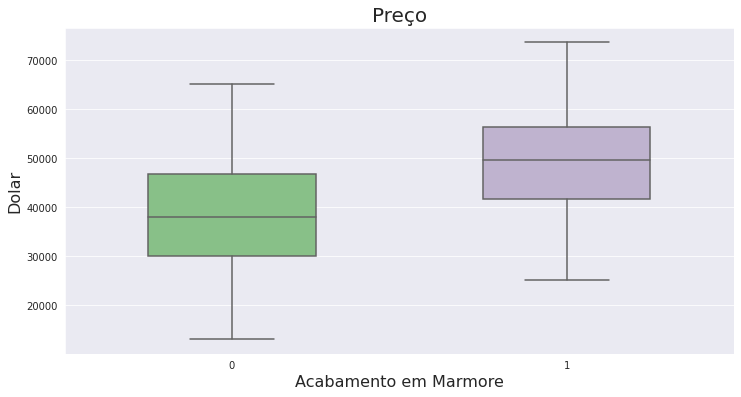

In [35]:
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço', fontsize=20)
ax.set_ylabel('Dolar', fontsize=16)
ax.set_xlabel('Acabamento em Marmore', fontsize=16)
ax

### Box-plot (Preço X Andares)

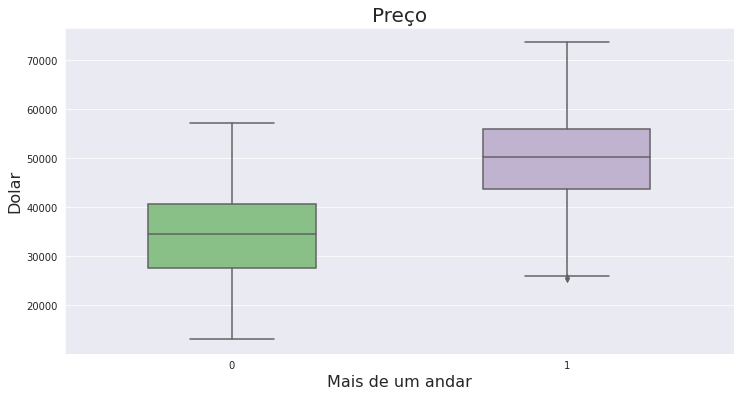

In [36]:
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço', fontsize=20)
ax.set_ylabel('Dolar', fontsize=16)
ax.set_xlabel('Mais de um andar', fontsize=16)
ax

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


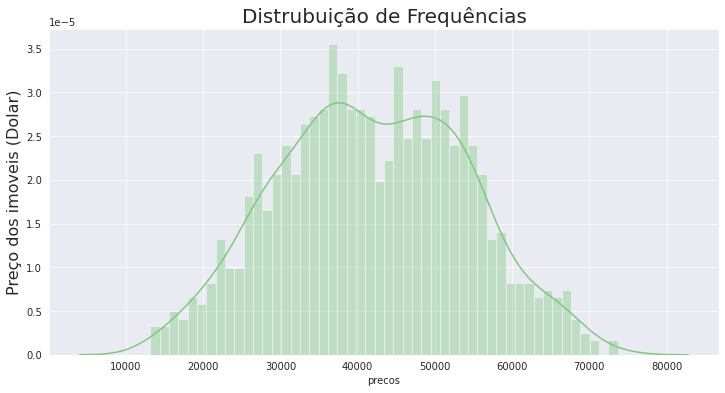

In [39]:
ax = sns.distplot(dados['precos'], bins=50)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Preço dos imoveis (Dolar)', fontsize=16)
ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

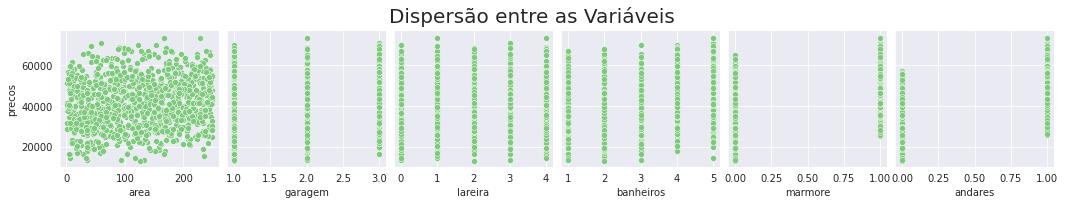

In [57]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'lareira', 'banheiros', 'marmore', 'andares'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

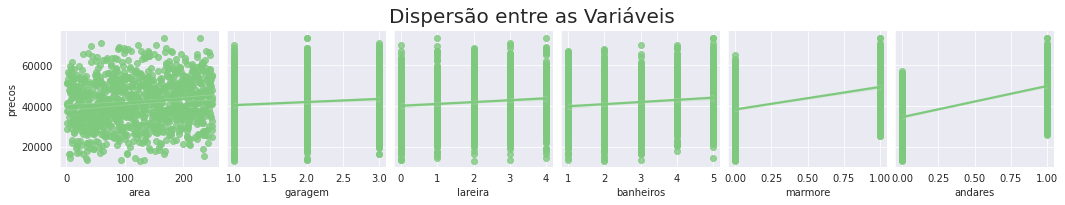

In [58]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'lareira', 'banheiros', 'marmore', 'andares'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [47]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [49]:
y = dados['precos']
y

0      51875
1      17875
2      47075
3      38575
4      33775
       ...  
995    29150
996    43550
997    56575
998    56075
999    13350
Name: precos, Length: 1000, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [59]:
x = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]
x

,area,garagem,banheiros,lareira,marmore,andares
0,25,3,4,3,0,1
1,35,1,3,1,0,0
2,195,2,4,2,0,0
3,33,2,2,1,0,1
4,11,2,3,0,0,1
...,...,...,...,...,...,...
995,48,1,5,4,0,0
996,112,2,2,3,0,1
997,185,3,4,4,0,1
998,185,2,3,1,0,1


## Criando os datasets de treino e de teste

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [77]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [78]:
modelo.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [79]:
modelo.score(x_train, y_train).round(3)

0.636

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [80]:
y_previsto = modelo.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [81]:
metrics.r2_score(y_test, y_previsto).round(3)

0.67

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [82]:
area=60
garagem=1	
banheiros=2	
lareira=0	
marmore=1	
andares=1
entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

modelo.predict(entrada)[0]

51039.766471134164

# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo com Temperatura Máxima

In [83]:
EQM_2 = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2_2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,50197019.50
REQM,7084.99
R²,0.67


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [84]:
import pickle

## Salvando o modelo estimado

In [85]:
output = open('modelo_preco_casas', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```